In [1]:
import numpy as np
import pandas as pd

### point data load(=ldps grid + obs point)

In [21]:
import numpy as np
import netCDF4 as nc
import glob

# nwp grid, stn(bias corrected) load, here example use obs data instead of bias corrected nwp
# nwp grid
#input_dir = "/Users/mankikim/JOB/DATA/"
#input_dir = "/Users/mankikim/Desktop/DATA_LINK/"
input_dir = r"D:/KMK_DATA/NWP/"
#files = glob.glob(input_dir + "*.nc")
files = glob.glob(input_dir + "l015_v070_erlo_unis_20kind.2023041000.nc")
print(files)
nc_file = nc.Dataset(files[-1])
print(nc_file)
# 
nwp_grd_u = np.array(nc.Dataset(files[-1]).variables['UGRD_10maboveground'])[0,:,:]
nwp_grd_v = np.array(nc.Dataset(files[-1]).variables['VGRD_10maboveground'])[0,:,:]
print("nwp_u: ", nwp_grd_u.shape)
print("nwp_v: ", nwp_grd_u.shape)
print(nwp_grd_u.min(), nwp_grd_u.max())
print(nwp_grd_v.min(), nwp_grd_v.max())
print(np.where(nwp_grd_v>=20))


nwp_lat = np.load("../fcst_wind/DAIO/nwp/ldaps_lat_grid")
nwp_lon = np.load("../fcst_wind/DAIO/nwp/ldaps_lon_grid")
print("lat shape: ", nwp_lat.shape)
print("lon shape: ", nwp_lon.shape)


# check diff --> 4째자리부터 차이 있음
dif_lon = []
dif_lat = []
#for i in range(nwp_lon.shape[0]):
#    for j in range(nwp_lon.shape[1]-1):
for i in range(100):
  for j in range(100):
      dif_lon.append( np.round(nwp_lon[i,j+1] - nwp_lon[i,j], 5))
      dif_lat.append( np.round(nwp_lat[i+1,j] - nwp_lat[i,j], 5))
dlon = np.array(set(dif_lon))
dlat = np.array(set(dif_lat))
print("dif lon: ", dlon)
print("dif lat: ", dlat)


# # LDAPS 9999값 확인 필요 
index = set(np.where(nwp_grd_u > 999.)[0])
print(sorted(index))





['D:/KMK_DATA/NWP/l015_v070_erlo_unis_20kind.2023041000.nc']
<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Conventions: CF-1.0
    History: Mon Apr 10 15:36:01 2023: ncrcat ./l015_v070_erlo_unis_h000.2023041000.nc ./l015_v070_erlo_unis_h001.2023041000.nc ./l015_v070_erlo_unis_h002.2023041000.nc ./l015_v070_erlo_unis_h003.2023041000.nc ./l015_v070_erlo_unis_h004.2023041000.nc ./l015_v070_erlo_unis_h005.2023041000.nc ./l015_v070_erlo_unis_h006.2023041000.nc ./l015_v070_erlo_unis_h007.2023041000.nc ./l015_v070_erlo_unis_h008.2023041000.nc ./l015_v070_erlo_unis_h009.2023041000.nc ./l015_v070_erlo_unis_h010.2023041000.nc ./l015_v070_erlo_unis_h011.2023041000.nc ./l015_v070_erlo_unis_h012.2023041000.nc ./l015_v070_erlo_unis_h013.2023041000.nc ./l015_v070_erlo_unis_h014.2023041000.nc ./l015_v070_erlo_unis_h015.2023041000.nc ./l015_v070_erlo_unis_h016.2023041000.nc ./l015_v070_erlo_unis_h017.2023041000.nc ./l015_v070_erlo_unis_h018.2023041000.nc ./l0

In [85]:
# obs stn for 불규칙 데이터
stn_latlon = {"47105": [37.7515, 128.891]}
obs_lat = stn_latlon['47105'][0]
obs_lon = stn_latlon['47105'][1]
obs_stnd = np.load("../fcst_wind/DAIO/obs_data_47105")
print(obs_stnd.shape)


# select U & V
#if sel_v == 'u':
#    nwp_grid[:,:,0]

(868, 49, 2)


#### 영역분리

In [72]:
# # 37~39, 127~129
print(nwp_lat.shape)
print(nwp_lon.shape)

lat_mask = (nwp_lat >= 37.0) & (nwp_lat <= 39.0)
lon_mask = (nwp_lon >= 127.0) & (nwp_lon <= 129.0)
ll_mask = lat_mask & lon_mask
#mask = ( (a<1) & (b<2) )
print(lat_mask)
print(lon_mask)
print(ll_mask)

ll_mask_idx = np.where(ll_mask==True)
print(ll_mask_idx[0])
print(ll_mask_idx[1])
y_idx = list(set(ll_mask_idx[0]))
x_idx = list(set(ll_mask_idx[1]))
sub_nwp_lat = nwp_lat[y_idx[0]:y_idx[-1]+1,x_idx[0]:x_idx[-1]+1]
sub_nwp_lon = nwp_lon[y_idx[0]:y_idx[-1]+1,x_idx[0]:x_idx[-1]+1]
sub_nwp_grd_u = nwp_grd_u[y_idx[0]:y_idx[-1]+1,x_idx[0]:x_idx[-1]+1]
print(sub_nwp_lat.shape)
print(sub_nwp_lon.shape)
print(sub_nwp_grd_u.shape)

print(sub_nwp_grd_u.min(), sub_nwp_grd_u.max())
print(sub_nwp_lat.min(), sub_nwp_lat.max())
print(sub_nwp_lon.min(), sub_nwp_lon.max())

# # .. test
# a = np.array([[2,2,2,2],
#               [2,0,1,2],
#               [2,1,0,2],
#               [2,2,2,2]])

# b = np.array([[2,2,2,2],
#               [2,1,0,2],
#               [2,0,1,2],
#               [2,2,2,2]])

# a_mask = (a < 2) & (a >=0)
# b_mask = (b < 2) & (b >=0)
# c_mask = a_mask & b_mask
# #mask = ( (a<1) & (b<2) )
# print(a_mask)
# print(b_mask)
# print(c_mask)
# print(type(c_mask))
# c_mask_idx = np.where(c_mask==True)
# print(c_mask_idx[0])
# print(c_mask_idx[1])
# y_idx = list(set(c_mask_idx[0]))
# x_idx = list(set(c_mask_idx[1]))
# c = a[y_idx[0]:y_idx[-1]+1,x_idx[0]:x_idx[-1]+1]
# print(c.shape)
# print(c)



(781, 602)
(781, 602)
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
[340 340 340 ... 486 486 486]
[317 318 319 ... 424 425 426]
(147, 117)
(147, 117)
(147, 117)
-6.090452 10.769899
36.970163730580865 39.03152178341463
126.97497790415062 129.0779151314157

### 불규칙데이터 생성

In [87]:
# 인풋 shape 만들기
flatten_input = []
for i in range(sub_nwp_lat.shape[0]): # lat
    for j in range(sub_nwp_lat.shape[1]): # lon
        flatten_input.append([ sub_nwp_lat[i,j], sub_nwp_lon[i,j], sub_nwp_grd_u[i,j] ])
flatten_input.append([obs_lat, obs_lon, obs_stnd[10,0,0]])


# asarray(copy=False)
print("ldps points: ",len(flatten_input))
input_data = np.asarray(flatten_input)
print(input_data[0:5])

# extract attribute 
lon_lat_data = input_data[:, 0:2]
qff_values = input_data[:, 2]

print(lon_lat_data[0][0], ',', lon_lat_data[0][1])
print(lon_lat_data[-1][0], ',', lon_lat_data[-1][1])
print(qff_values[0])

print(lon_lat_data.shape)
print(qff_values.shape)
print(np.min(qff_values), np.max(qff_values))




ldps points:  17200
[[ 37.00975225 126.9749779   -1.22619438]
 [ 37.00958252 126.99227913  -1.23010063]
 [ 37.00940981 127.00958026  -1.25402641]
 [ 37.00923411 127.02688129  -1.27160454]
 [ 37.00905543 127.04418223  -1.23205376]]
37.00975224570533 , 126.97497790415062
37.7515 , 128.891
-1.2261943817138672
(17200, 2)
(17200,)
-6.090452194213867 10.769899368286133


In [ ]:
#!C:\Users\tjoeun\AppData\Local\Programs\Python\Python39\Scripts\pip install fast-barnes-py

### Objective analysis - barnes

In [88]:
#!pip install fast-barnes-py
# definition of a 12Â° x 12Â° grid starting at 9Â°W / 47Â°N
# resolution = 200.
# step = 1.0 / resolution # 1도안에 넣을개수
# x0 = np.asarray([lon_lat_data[0][0], lon_lat_data[0][1]], dtype=np.float64)
# size = (int(2.0 / step), int(2.0 / step)) # 37~39, 127~129
# Xend1 = x0[0] + (step*size[0])
# Xend2 = x0[1] + (step*size[1])


lat_dist = round(abs(lon_lat_data[:,0].min() - lon_lat_data[:,0].max()))
lon_dist = round(abs(lon_lat_data[:,1].min() - lon_lat_data[:,1].max()))
step = 0.005
x0 = np.asarray([round(lon_lat_data[0][0]), round(lon_lat_data[0][1])], dtype=np.float64)
size = (int(lat_dist / step), int(lon_dist / step))
x_e_lat = x0[0] + (step*size[0])
x_e_lon = x0[1] + (step*size[1])
print("start: ", x0)
print("lat dist: ", lat_dist)
print("lon dist: ", lon_dist)
print("step: ", step)
print("oa dim: ", size)
print("end: ", x_e_lat, x_e_lon)



# calculate Barnes interpolation
from fastbarnes import interpolation
sigma = 1.0
field = interpolation.barnes(lon_lat_data, qff_values, sigma, x0, step, size)
print(type(field))
print(np.round(field, 2))
print(np.min(field), np.max(field))

#field.shape
#field_1 = np.where( (field<=20.) & (field>=-20.) , field, 0.)

start:  [ 37. 127.]
lat dist:  2
lon dist:  2
step:  0.005
oa dim:  (400, 400)
end:  39.0 129.0
<class 'numpy.ndarray'>
[[0.72 0.72 0.72 ... 0.99 0.99 0.99]
 [0.72 0.72 0.73 ... 0.99 0.99 0.99]
 [0.73 0.73 0.73 ... 0.99 0.99 1.  ]
 ...
 [1.19 1.19 1.19 ... 1.47 1.47 1.47]
 [1.19 1.19 1.19 ... 1.47 1.47 1.47]
 [1.19 1.19 1.19 ... 1.47 1.47 1.47]]
0.7231322 1.4732345


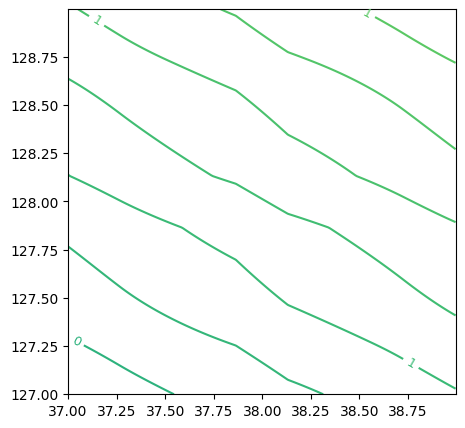

In [91]:
# draw graphic with labeled contours and scattered sample points
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))

gridX = np.arange(x0[0], x0[0]+size[1]*step, step)
gridY = np.arange(x0[1], x0[1]+size[0]*step, step)
levels = np.arange(-3, 3, 0.1)
cs = plt.contour(gridX, gridY, field, levels)
plt.clabel(cs, levels[::2], fmt='%d', fontsize=9)

#plt.scatter(lon_lat_data[:, 0], lon_lat_data[:, 1], color='red', s=20, marker='.')

plt.show()

In [ ]:
# input_data = np.asarray([
#     [-3.73,56.33,995.1], [2.64,47.05,1012.5], [-8.40,47.50,1011.3], [2.94,54.33,1006.0], [-2.90,49.90,1006.3],
#     [-8.98,53.72,1002.1], [1.20,58.60,1002.6], [1.60,50.73,1009.1], [-7.38,57.36,997.7], [-1.25,53.01,1000.4],
#     [-4.74,52.79,998.4], [-0.61,47.48,1013.0], [-6.10,50.10,1004.3], [-6.46,54.87,996.4], [-3.22,47.29,1012.8],
#     [-1.60,55.42,996.6], [2.30,56.60,1004.5], [1.12,52.95,1003.6], [-0.90,57.80,999.9], [-7.90,51.40,1002.6],
#     [-0.70,50.10,1007.5], [2.53,49.02,1010.8], [-5.06,48.47,1008.5], [-3.10,53.60,997.5], [-5.63,57.86,997.8],
#     [-6.90,52.85,1000.9], [-4.15,51.09,1002.6], [-1.99,51.50,1002.7], [1.21,47.68,1011.7], [-5.70,56.30,995.5],
#     [-1.98,53.13,998.5], [1.09,49.93,1009.0], [1.72,58.42,1002.9], [-6.30,52.30,999.4], [0.70,57.70,1001.9],
#     [-3.50,53.60,995.9], [1.38,48.06,1011.6], [-4.37,51.71,1001.1], [-3.09,58.45,998.5], [2.00,56.40,1003.9],
#     [1.90,57.00,1003.3], [0.45,51.90,1004.9], [-8.25,51.80,1002.5], [-1.87,53.81,997.4], [-2.38,55.71,995.1],
#     [-4.01,54.80,992.1], [0.88,53.37,1002.6], [-1.69,51.86,1002.1], [-4.57,52.14,999.6], [-0.20,58.40,1001.1],
# ])

# lon_lat_data = input_data[:, 0:2]
# qff_values = input_data[:, 2]
# input_data.shape

# print(input_data[:,0].min())
# print(input_data[:,0].max())
# print(input_data[:,0].min() - input_data[:,0].max())
# print(lon_lat_data[:,0])

# # definition of a 12Â° x 12Â° grid starting at 9Â°W / 47Â°N
# resolution = 32.0
# step = 1.0 / resolution
# x0 = np.asarray([-9.0, 47.0], dtype=np.float64)
# size = (int(12.0 / step), int(12.0 / step))
# Xend1 = x0[0] + (step*size[0])
# Xend2 = x0[1] + (step*size[1])

# print(x0)
# print(step)
# print(size)
# print(Xend1, Xend2)

# # calculate Barnes interpolation
# from fastbarnes import interpolation
# sigma = 1.0
# field = interpolation.barnes(lon_lat_data, qff_values, sigma, x0, step, size)


# # draw graphic with labeled contours and scattered sample points
# import matplotlib.pyplot as plt
# plt.figure(figsize=(5, 5))

# gridX = np.arange(x0[0], x0[0]+size[1]*step, step)
# gridY = np.arange(x0[1], x0[1]+size[0]*step, step)
# levels = np.arange(976, 1026, 2)
# cs = plt.contour(gridX, gridY, field, levels)
# plt.clabel(cs, levels[::2], fmt='%d', fontsize=9)

# plt.scatter(lon_lat_data[:, 0], lon_lat_data[:, 1], color='red', s=20, marker='.')

# plt.show()

In [ ]:
import numpy as np

# Create a NumPy array
array = np.array([[True, False, True],
                  [False, True, False]])
print(array.shape)
# Get the true indices
true_indices = np.argwhere(array)

# Print the true indices
print(true_indices)